In [9]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

from convenience_functions import get_mnist

from NetworkModules.Network import Network
from NetworkModules.Layers import *
from NetworkModules.Activations import *
from NetworkModules.LossFunctions import *  


# MNIST Dataset

In [10]:
train_X, train_Y, test_X, test_Y = get_mnist("C:/Users/nisha/project_repositories/MNIST_from_scratch/MNIST_From_Scratch/dataset")


print(f'Train X shape = {train_X.shape}')
print(f'Train Y shape = {train_Y.shape}')
print(f'Test  X shape  = {test_X.shape}')
print(f'Test  Y shape  = {test_Y.shape}')


Train X shape = (60000, 784)
Train Y shape = (60000, 10)
Test  X shape  = (10000, 784)
Test  Y shape  = (10000, 10)


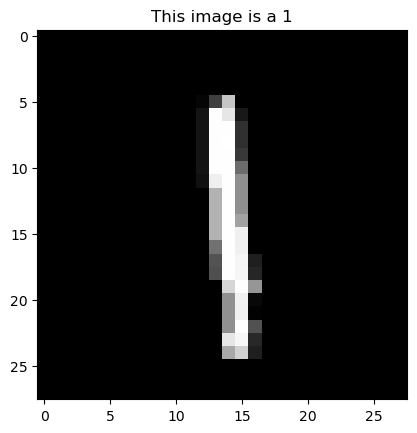

In [11]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = 8
image = train_X[sample].reshape(28, 28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title(f'This image is a {int(np.argwhere(train_Y[sample]== 1))}')
plt.show()

In [22]:
net = Network()
net.add_layer(FullyConnectedLinearLayer(784, 500))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.4)
net.add_layer(FullyConnectedLinearLayer(500, 300))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.6)
net.add_layer(FullyConnectedLinearLayer(300, 10))
net.add_layer(ActivationLayer(softmax, dsoftmax))

net.set_loss(cross_entropy_loss, dcross_entropy_loss)

net.load_data( train_X[0:60000,:].T, train_Y[0:60000,:].T, test_X[0:10000,:].T, test_Y[0:10000,:].T)

net._reinitalize_weights()

def accuracy_metric(X, Y):
    return (np.argmax(net.inference(X), axis=0) == np.argmax(Y, axis=0)).sum() / Y.shape[1] * 100

net.add_accurace_function(accuracy_metric)


net._mini_batch_Adam(learning_rate=0.001, epochs = 5, batch_size = 128, L2_reg = False, L2_lambda = 0.1, adaptive_learning_rate='exponential decay')



iter       Loss      Train Accuracy        Val Accuracy
1           0.7                91.7               92.06
5          0.51               91.43               91.51
Training Complete


In [23]:
total_parms = 0

for layer in net.layers:
    if isinstance(layer, FullyConnectedLinearLayer):
        total_parms += np.prod(layer.weights.shape) + np.prod(layer.biases.shape)

total_parms

545810

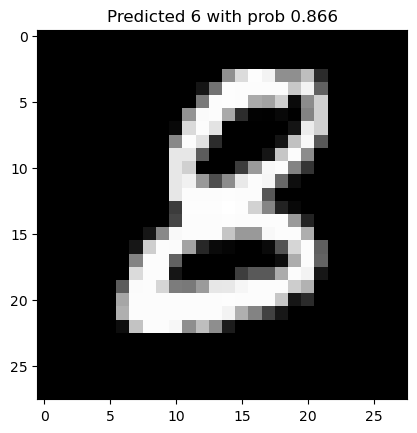

In [25]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = np.random.randint(0, 10000)
image = test_X[sample].reshape(28, 28)

example = test_X[sample].reshape(784, 1)
y_out= net.inference(example)

ind = np.argmax(y_out)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')

plt.title(f'Predicted {ind} with prob {round(float(y_out[ind]),3)}')
plt.show()

In [39]:
test_Y[sample].argmax()

2

In [26]:



# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]]).T
y_train = np.array([[0], [1], [1], [0]]).T


net = Network()
net.add_layer(FullyConnectedLinearLayer(2, 3))
net.add_layer(ActivationLayer(tanh, dtanh))
net.add_layer(FullyConnectedLinearLayer(3, 1))
net.add_layer(ActivationLayer(tanh, dtanh))

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train)

net.add_accurace_function(mse_loss)

net._stochastic_gradient_descent(learning_rate=0.1, epochs=100)

iter       Loss      Train Accuracy        Val Accuracy


AttributeError: 'NoneType' object has no attribute 'any'

# Individual Assignment Data


In [27]:
from scipy.io import loadmat

dat = {}
NN_data = loadmat('dataset/NN_proj_data_10.mat', mdict = dat)

In [93]:
x_train = dat['inp_train']
y_train = dat['y10']

x_valid = dat['inp_valid']
y_valid = dat['y10val']

net = Network()
net.add_layer(FullyConnectedLinearLayer(1, 50))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob= 0.95)
net.add_layer(FullyConnectedLinearLayer(50, 25))
net.add_layer(ActivationLayer(tanh, dtanh), dropout_layer=True, keep_prob= 0.95)
net.add_layer(FullyConnectedLinearLayer(25, 1))


# net.add_layer(ActivationLayer(tanh, dtanh))

# net._reinitalize_weights()

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train, x_valid, y_valid)


def mse_accuracy(X, Y):
    return np.mean(np.power(net.inference(X) - Y, 2))

net.add_accurace_function(mse_accuracy)

net._mini_batch_Adam(learning_rate=0.001, epochs=500, batch_size = 64, L2_reg=True, L2_lambda=0.001)



iter       Loss      Train Accuracy        Val Accuracy
1          1.15                1.08                0.89
6           0.5                0.42                0.43
11         0.13                0.11                0.66
16         0.11                0.04                1.08
21         0.08                0.04                1.31
26         0.07                0.03                1.26
31         0.07                0.03                1.15
36          0.1                0.03                1.12
41         0.08                0.02                1.11
46         0.05                0.02                1.14
51         0.07                0.02                1.18
56         0.07                0.02                1.17
61         0.06                0.02                1.18
66         0.05                0.02                1.17
71         0.05                0.02                1.16
76         0.07                0.02                1.17
81         0.05                0.02             

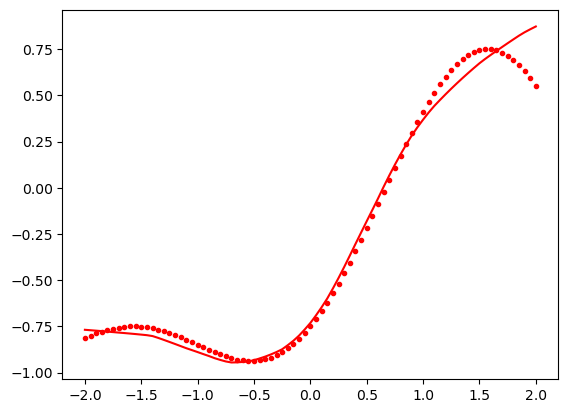

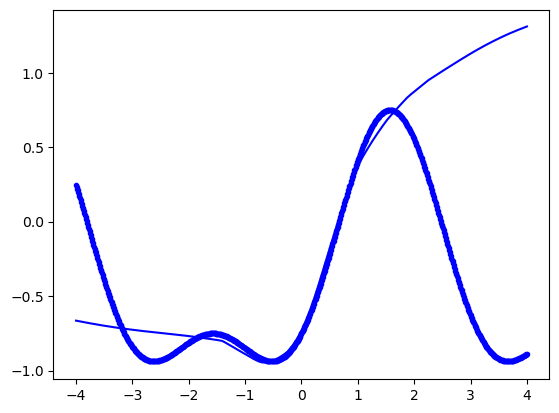

In [94]:
plt.plot(x_train.T, y_train.T, 'r.')
plt.plot(x_train.T, net.inference(x_train).T, 'r')
plt.show()
plt.plot(x_valid.T, y_valid.T, 'b.')
plt.plot(x_valid.T, net.inference(x_valid).T, 'b')
plt.show()



In [ ]:
net.inference(x_valid)